# Lab 6 - model comparison

In [30]:
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel

Excercise 1 - generate data

11:26:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


11:26:44 - cmdstanpy - INFO - CmdStan done processing.


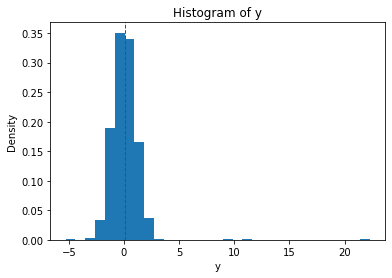

In [22]:
F = 5
L = 5
N = (F + L)*100
stan1=CmdStanModel(stan_file='code_1.stan')
samples1 = stan1.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)


# Extract the values of y from the Stan output
y1 = samples1.stan_variable('y')[0]

# Create a histogram of the generated samples
plt.hist(y1, bins=int(np.sqrt(N)), density=True)
plt.axvline(np.mean(y1), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Histogram of y')
plt.show()




11:29:26 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


11:29:28 - cmdstanpy - INFO - CmdStan done processing.


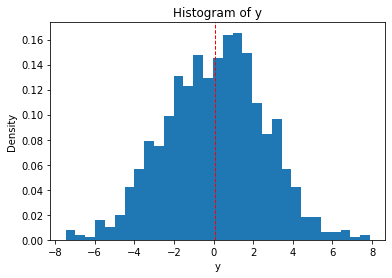

In [25]:
stan2=CmdStanModel(stan_file='code_2.stan')
samples2 = stan2.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)


# Extract the values of y from the Stan output
y2 = samples2.stan_variable('y')[0]

# Create a histogram of the generated samples
plt.hist(y2, bins=int(np.sqrt(N)), density=True)
plt.axvline(np.mean(y2), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Histogram of y')
plt.show()

Excercise 2 - compare normal and student models for data from first file

In [28]:
data1 = {
    'N': N,
    'y': y1
}

data2={
    'N': N,
    'y': y2
}

stan3=CmdStanModel(stan_file='code_3.stan')
samples3 = stan3.sample(data=data1, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
samples3_2 = stan3.sample(data=data2, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)



11:32:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


11:32:10 - cmdstanpy - INFO - CmdStan done processing.
11:32:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed                      


11:32:11 - cmdstanpy - INFO - CmdStan done processing.


In [29]:
stan4=CmdStanModel(stan_file='code_4.stan')
samples4 = stan4.sample(data=data1, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
samples4_2 = stan4.sample(data=data2, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)


11:32:44 - cmdstanpy - INFO - compiling stan file /home/lab6/code_4.stan to exe file /home/lab6/code_4
11:32:58 - cmdstanpy - INFO - compiled model executable: /home/lab6/code_4
11:32:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


11:32:59 - cmdstanpy - INFO - CmdStan done processing.


11:32:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


11:33:00 - cmdstanpy - INFO - CmdStan done processing.


Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


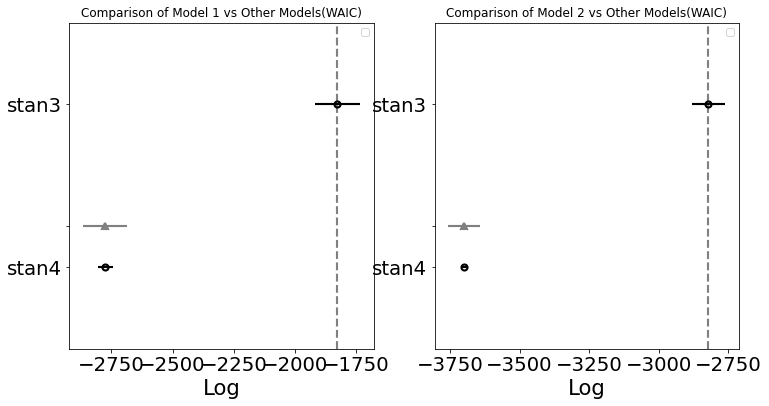

In [63]:
# Compare the models using WAIC
compare_dict_1 = {'stan3': samples3,'stan4': samples4}
compare_dict_2 = {'stan3': samples3_2,'stan4': samples4_2}

waic_df_1 = az.compare(compare_dict_1, ic = 'waic')

waic_df_2 = az.compare(compare_dict_2, ic = 'waic')

# Plot the comparison metrics
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

az.plot_compare(waic_df_1, figsize=(8, 6), insample_dev=False, ax=ax1)
ax1.set_title('Comparison of Model 1 vs Other Models(WAIC)')
ax1.legend()

az.plot_compare(waic_df_2, figsize=(8, 6), insample_dev=False, ax=ax2)
ax2.set_title('Comparison of Model 2 vs Other Models(WAIC)')
ax2.legend()

plt.show()

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

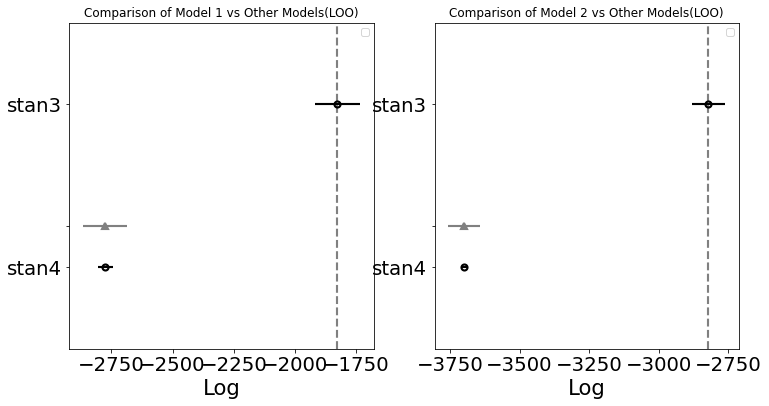

In [64]:
# Compare the models using loo
compare_dict_1_1 = {'stan3': samples3,'stan4': samples4}
compare_dict_2_2 = {'stan3': samples3_2,'stan4': samples4_2}

loo_df_1  = az.compare(compare_dict_1_1, ic = 'loo')

loo_df_2  = az.compare(compare_dict_2_2, ic = 'loo')

# Plot the comparison metrics
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

az.plot_compare(loo_df_1, figsize=(8, 6), insample_dev=False, ax=ax1)
ax1.set_title('Comparison of Model 1 vs Other Models(LOO)')
ax1.legend()

az.plot_compare(loo_df_2, figsize=(8, 6), insample_dev=False, ax=ax2)
ax2.set_title('Comparison of Model 2 vs Other Models(LOO)')
ax2.legend()

plt.show()

Excercise 3 - compare models with different numbers of predictors

In [78]:
# Extract 'X' from the Stan samples
x = samples2.stan_variable('X')

# Reshape 'X' into matrices with different numbers of predictors
# x1 has 1 predictor
x1 = x.reshape(1000,-1)[0:1,:N]
x1 = np.transpose(x1)

# x2 has 2 predictors
x2 = x.reshape(1000,-1)[0:2,:N]
x2 = np.transpose(x2)

# x3 has 3 predictors
x3 = x.reshape(1000,-1)[0:3,:N]
x3 = np.transpose(x3)

In [75]:
stan5=CmdStanModel(stan_file='code_5.stan')
samples5_1 = stan5.sample(data = {'N':N,'K':1,'y':y2,'X':x1}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

samples5_2 = stan5.sample(data = {'N':N,'K':2,'y':y2,'X':x2}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
                            

samples5_3 = stan5.sample(data = {'N':N,'K':3,'y':y2,'X':x3}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

12:47:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


12:47:09 - cmdstanpy - INFO - CmdStan done processing.


12:47:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


12:47:10 - cmdstanpy - INFO - CmdStan done processing.


12:47:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


12:47:11 - cmdstanpy - INFO - CmdStan done processing.


        rank        waic        p_waic     d_waic    weight         se  \
model1     0 -2372.99474  3.780123e-28    0.00000  0.952416  31.112000   
model3     1 -2817.83836  6.430695e-28  444.84362  0.000000  62.997941   
model2     2 -2848.46239  4.514257e-28  475.46765  0.047584  11.076016   

              dse  warning waic_scale  
model1   0.000000    False        log  
model3  41.122524    False        log  
model2  28.154005    False        log  


Text(0.5, 1.0, 'Comparison of Model 1 vs Other Models(WAIC)')

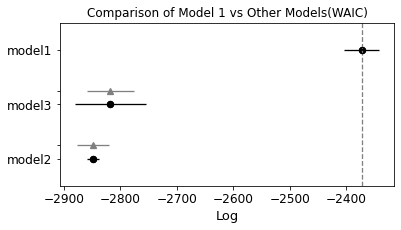

In [76]:
# Create dictionary of model samples
model_dict5 = {'model1': samples5_1, 'model2': samples5_2, 'model3': samples5_3}

# Compute WAIC for each model using arviz.compare()
model_compare_waic = az.compare(model_dict5, ic='waic')

# Print and plot WAIC values
print(model_compare_waic.head())
az.plot_compare(model_compare_waic)
plt.title('Comparison of Model 1 vs Other Models(WAIC)')

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


        rank         loo  p_loo      d_loo    weight         se        dse  \
model1     0 -2372.99474    0.0    0.00000  0.952416  31.112000   0.000000   
model3     1 -2817.83836    0.0  444.84362  0.000000  62.997941  41.122524   
model2     2 -2848.46239    0.0  475.46765  0.047584  11.076016  28.154005   

        warning loo_scale  
model1     True       log  
model3     True       log  
model2     True       log  


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Text(0.5, 1.0, 'Comparison of Model 1 vs Other Models(LOO)')

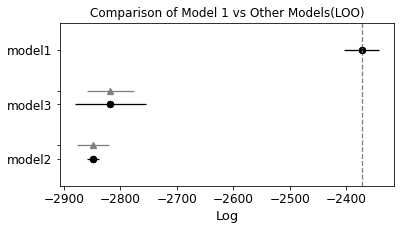

In [77]:
# Compute LOO for each model using arviz.compare()
model_compare_loo = az.compare(model_dict5, ic = 'loo')
# Print and plot WAIC values
print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('Comparison of Model 1 vs Other Models(LOO)')